# SF Giants Run Differential

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',500)

In [2]:
games = pd.read_csv('../Data/Created/GiantsTrain.csv')
games.head()

,date,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,vis_mngr_name,hom_mngr_name,win_pitcher_name,lose_pitch_name,sve_pitch_name,gwrbi_name,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_W/L,v_W/L,W,L,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
0,19890410,LAN,1,6,SFN,1,6,7,4,54,1,SFO02,53015.0,212,39,12,2,0,3,7,0,0,0,5,2,5,1,1,1,10,3,4,4,0,1,27,10,1,0,2,0,30,7,1,0,0,3,1,1,0,7,1,11,1,0,2,8,4,6,6,0,0,27,9,2,0,2,0,Tom Lasorda,Roger Craig,Orel Hershiser,Mike LaCoss,Alejandro Pena,Eddie Murray,-3,1989,11,7,6,23,8,L,W,LAN,SFN,642.0,163.0,114.0,29.0,5.0,15.0,73.0,247.0,4.0,59.0,9.0,80.0,119.0,14.0,9.0,130.0,55.0,45.0,10.0,20.0,831.0,170.0,121.0,38.0,0.0,11.0,64.0,241.0,5.0,85.0,16.0,73.0,145.0,11.0,13.0,169.0,74.0,63.0,24.0,21.0,0.308,0.233,0.487,0.500,0.590,0.267,1.077,0.767,0.128205,0.366667,0.179,0.267,0.18,0.27
1,19890411,LAN,1,7,SFN,1,7,3,8,51,1,SFO02,17722.0,176,32,8,3,0,0,3,1,1,0,3,2,7,0,1,1,7,4,8,8,1,0,24,8,0,0,0,0,36,13,4,0,1,8,1,0,0,2,0,4,0,0,0,7,2,1,1,0,0,27,9,1,0,1,0,Tom Lasorda,Roger Craig,Kelly Downs,Tim Leary,Craig Lefferts,Will Clark,5,1989,11,5,8,11,20,W,L,SFN,LAN,675.0,172.0,118.0,31.0,6.0,17.0,79.0,266.0,6.0,60.0,9.0,86.0,125.0,15.0,9.0,136.0,58.0,46.0,11.0,21.0,909.0,184.0,133.0,39.0,0.0,12.0,67.0,259.0,7.0,93.0,18.0,77.0,159.0,13.0,13.0,187.0,83.0,68.0,25.0,25.0,0.250,0.361,0.406,0.417,0.344,0.556,0.750,0.973,0.218750,0.111111,0.156,0.056,0.16,0.06
2,19890412,LAN,1,8,SFN,1,8,1,3,51,1,SFO02,19035.0,169,30,5,0,0,0,1,1,0,0,4,0,4,0,0,1,7,4,3,3,0,0,24,9,0,0,0,0,30,9,0,0,1,3,1,0,0,2,0,5,0,2,0,6,4,1,1,0,0,27,11,0,0,1,0,Tom Lasorda,Roger Craig,Scott Garrelts,Fernando Valenzuela,Mike LaCoss,Kevin Mitchell,2,1989,4,5,8,5,12,W,L,SFN,LAN,709.0,182.0,123.0,35.0,6.0,18.0,85.0,283.0,6.0,63.0,12.0,92.0,129.0,15.0,10.0,143.0,61.0,47.0,13.0,24.0,955.0,195.0,140.0,40.0,2.0,13.0,73.0,278.0,7.0,97.0,20.0,83.0,169.0,14.0,14.0,194.0,88.0,75.0,26.0,27.0,0.167,0.300,0.300,0.367,0.167,0.400,0.467,0.767,0.133333,0.166667,0.133,0.067,0.13,0.07
3,19890414,ATL,1,10,SFN,1,9,5,7,51,1,SFO02,11808.0,151,35,9,1,0,2,5,1,0,0,2,0,7,1,0,0,6,3,7,7,0,0,24,11,0,0,0,0,30,9,2,1,1,7,2,1,1,2,0,5,1,0,0,5,3,5,5,0,0,27,11,0,0,0,0,Russ Nixon,Roger Craig,Rick Reuschel,Zane Smith,Craig Lefferts,Jose Uribe,2,1989,12,6,5,16,16,W,L,SFN,ATL,735.0,186.0,123.0,37.0,7.0,19.0,91.0,294.0,7.0,69.0,12.0,100.0,131.0,16.0,10.0,146.0,64.0,50.0,17.0,25.0,911.0,210.0,151.0,34.0,3.0,22.0,84.0,316.0,7.0,89.0,5.0,94.0,180.0,19.0,8.0,194.0,76.0,107.0,25.0,17.0,0.257,0.300,0.314,0.400,0.457,0.533,0.771,0.933,0.200000,0.166667,0.057,0.067,0.06,0.07
4,19890415,ATL,1,11,SFN,1,10,0,1,51,0,SFO02,29798.0,138,28,2,0,0,0,0,0,0,0,1,0,8,0,0,1,2,1,0,0,0,0,24,3,1,0,0,0,28,3,1,0,0,1,0,0,0,1,0,13,1,0,0,4,2,0,0,0,0,27,13,0,0,1,0,Russ Nixon,Roger Craig,Atlee Hammaker,Pete Smith,(none),Terry Kennedy,1,1989,1,2,2,2,4,W,L,SFN,ATL,767.0,197.0,131.0,40.0,7.0,19.0,94.0,308.0,7.0,74.0,13.0,103.0,136.0,16.0,10.0,159.0,66.0,51.0,18.0,25.0,946.0,221.0,160.0,35.0,3.0,23.0,88.0,331.0,7.0,95.0,6.0,99.0,187.0,21.0,9.0,207.0,80.0,110.0,28.0,17.0,0.071,0.107,0.107,0.143

In [3]:
val = pd.read_csv('../Data/Created/GiantsVal.csv')

In [4]:
games.shape

(2517, 139)

In [5]:
games.head(2)

,date,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,vis_mngr_name,hom_mngr_name,win_pitcher_name,lose_pitch_name,sve_pitch_name,gwrbi_name,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_W/L,v_W/L,W,L,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
0,19890410,LAN,1,6,SFN,1,6,7,4,54,1,SFO02,53015.0,212,39,12,2,0,3,7,0,0,0,5,2,5,1,1,1,10,3,4,4,0,1,27,10,1,0,2,0,30,7,1,0,0,3,1,1,0,7,1,11,1,0,2,8,4,6,6,0,0,27,9,2,0,2,0,Tom Lasorda,Roger Craig,Orel Hershiser,Mike LaCoss,Alejandro Pena,Eddie Murray,-3,1989,11,7,6,23,8,L,W,LAN,SFN,642.0,163.0,114.0,29.0,5.0,15.0,73.0,247.0,4.0,59.0,9.0,80.0,119.0,14.0,9.0,130.0,55.0,45.0,10.0,20.0,831.0,170.0,121.0,38.0,0.0,11.0,64.0,241.0,5.0,85.0,16.0,73.0,145.0,11.0,13.0,169.0,74.0,63.0,24.0,21.0,0.308,0.233,0.487,0.500,0.590,0.267,1.077,0.767,0.128205,0.366667,0.179,0.267,0.18,0.27
1,19890411,LAN,1,7,SFN,1,7,3,8,51,1,SFO02,17722.0,176,32,8,3,0,0,3,1,1,0,3,2,7,0,1,1,7,4,8,8,1,0,24,8,0,0,0,0,36,13,4,0,1,8,1,0,0,2,0,4,0,0,0,7,2,1,1,0,0,27,9,1,0,1,0,Tom Lasorda,Roger Craig,Kelly Downs,Tim Leary,Craig Lefferts,Will Clark,5,1989,11,5,8,11,20,W,L,SFN,LAN,675.0,172.0,118.0,31.0,6.0,17.0,79.0,266.0,6.0,60.0,9.0,86.0,125.0,15.0,9.0,136.0,58.0,46.0,11.0,21.0,909.0,184.0,133.0,39.0,0.0,12.0,67.0,259.0,7.0,93.0,18.0,77.0,159.0,13.0,13.0,187.0,83.0,68.0,25.0,25.0,0.250,0.361,0.406,0.417,0.344,0.556,0.750,0.973,0.218750,0.111111,0.156,0.056,0.16,0.06


In [6]:
# features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_ops','h_ops','v_runs','home_team','visitor_team']
features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_ops','h_ops','v_roll_rbis','v_roll_tbs','v_bb_rat','v_sb_rat','h_bb_rat','h_sb_rat','v_k_rat','h_k_rat','v_runs','home_team','visitor_team','park_id']
X = games[features]
y = games['run_diff']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2023)

In [8]:
categorical_columns = ['home_team','visitor_team','park_id']

ct = ColumnTransformer(
    transformers=[
        ('oh', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [9]:
pipe = Pipeline(steps=[
    ('ct', ct),
    ('rf', RandomForestRegressor())
])

In [10]:
%%time
pipe.fit(X_train, y_train)

CPU times: user 1.97 s, sys: 20.3 ms, total: 1.99 s
Wall time: 2 s


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['home_team', 'visitor_team',
                                                   'park_id'])])),
                ('rf', RandomForestRegressor())])

In [11]:
pipe.score(X_val, y_val)

0.824030653755468

In [12]:
preds = pipe.predict(X_val)
preds = pd.DataFrame(preds)

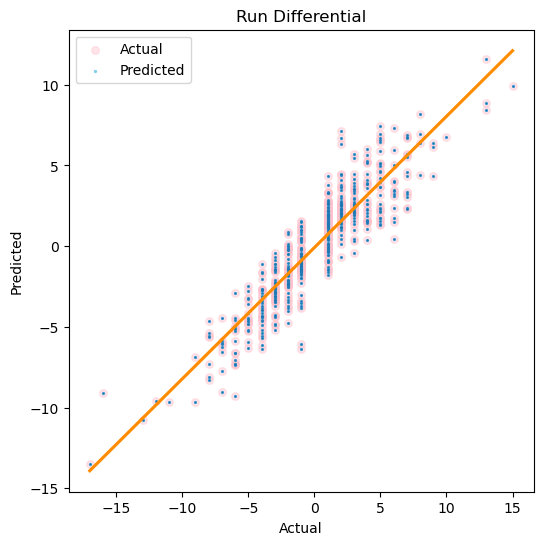

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, preds, color='pink', label='Actual' ,alpha=.4, s=30)
plt.scatter(y_val, preds, color='skyblue', label='Predicted',s=2)
sns.regplot(x=y_val, y =preds, scatter_kws={'s': 1}, line_kws={'color':'darkorange'}, ci=None)
plt.title('Run Differential')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();